<a href="https://colab.research.google.com/github/andrewshiva/convert-black-and-white-picture-into-colour-using-DeOldify/blob/master/colour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 2091 (delta 4), reused 1 (delta 0), pack-reused 2083
Receiving objects: 100% (2091/2091), 69.35 MiB | 11.96 MiB/s, done.
Resolving deltas: 100% (940/940), done.


In [2]:
cd DeOldify

/content/DeOldify


In [3]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

GPU not available.


In [4]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 215kB 2.7MB/s 
     |████████████████████████████████| 133kB 8.9MB/s 
     |████████████████████████████████| 1.8MB 10.5MB/s 
     |████████████████████████████████| 7.6MB 22.7MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6084 sha256=f1beda98c49034247ea2b95f46f91b9aab1c53af12f58fac1013ff0f83cfeb31
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0


In [5]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [6]:
!mkdir 'models'
!wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth

--2020-07-12 16:47:07--  https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth [following]
--2020-07-12 16:47:08--  https://www.dropbox.com/s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc71cc1286e612c4c89575571d98.dl.dropboxusercontent.com/cd/0/inline/A7bkeNT7u1rg4-9KgU--9KHvBj1oBzSrs1-WZNIibTwdiUf9NqC4HwQ5llTHj9COekI6We6tB-Bf0ped2YfXqor9gxwH9l1yQAYpCuE7nAqFYg/file# [following]
--2020-07-12 16:47:08--  https://uc71cc1286e612c4c89575571d98.dl.dropboxusercontent.com/cd/0/inline/A7bkeNT7u1rg4-9KgU--9KHvBj1oBzSrs1-WZNIibTwdiUf9NqC4HwQ5llTHj9COekI6We6tB-Bf0ped2YfXqor9gxw

In [7]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2020-07-12 16:47:47--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2020-07-12 16:47:48 (67.6 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [8]:
colorizer = get_image_colorizer(artistic=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


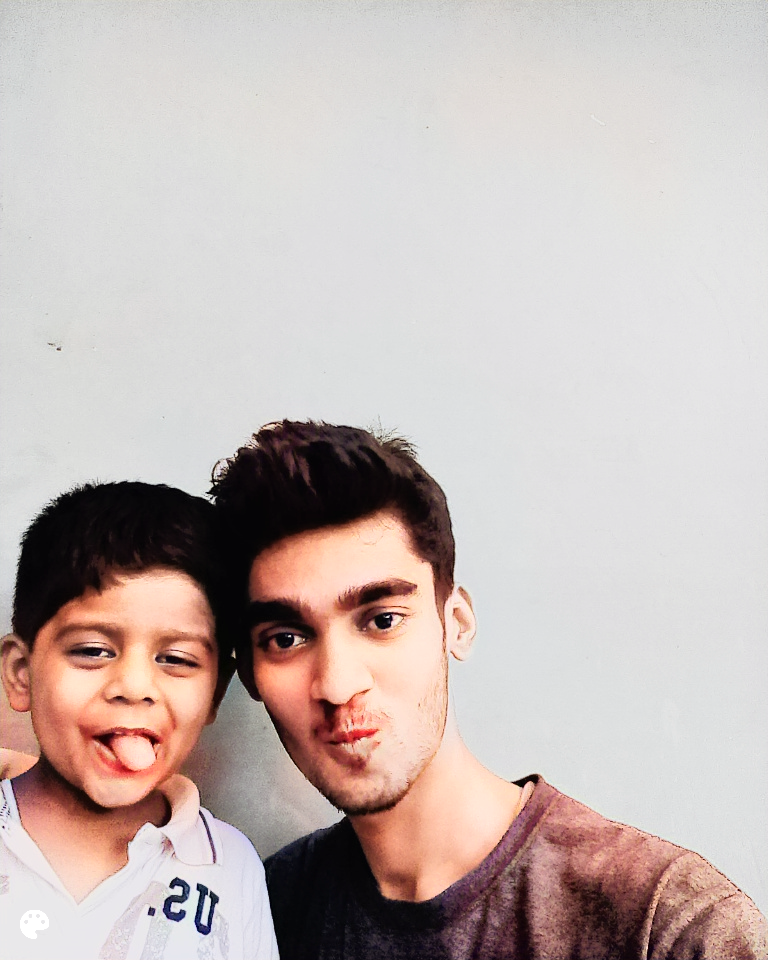

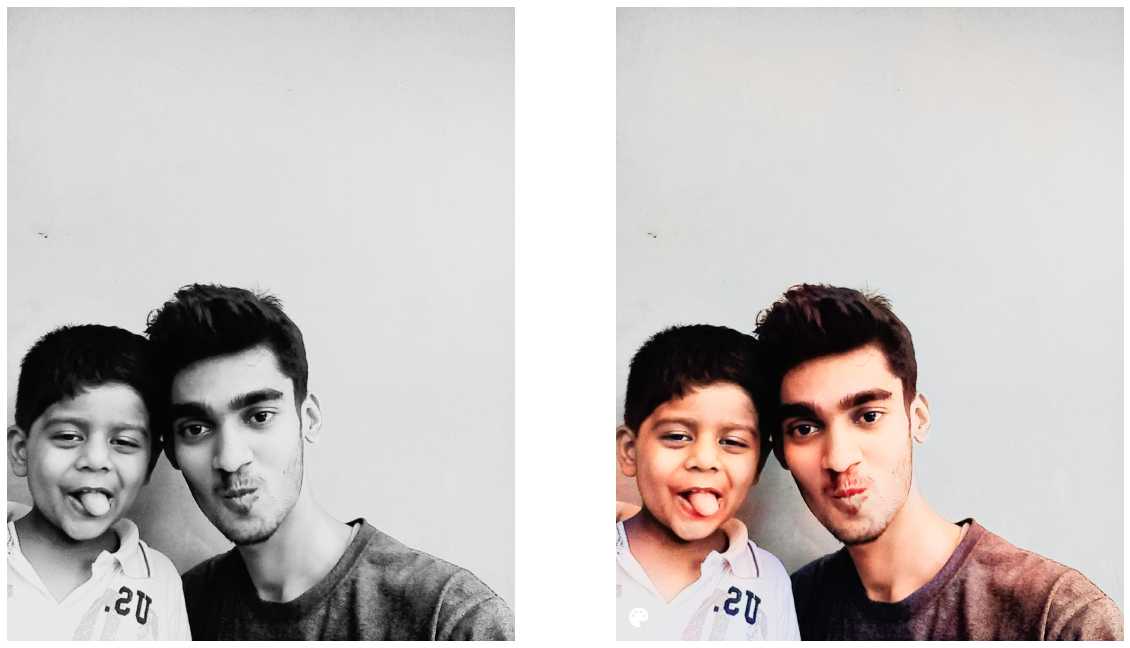

In [10]:
source_url = 'https://raw.githubusercontent.com/andrewshiva/convert-black-and-white-picture-into-colour-using-DeOldify/master/IMG_20160907_101817-ConvertImage.jpg' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')